# How to use the Hub

The Hub is a cloud computing resource made available by University of Cantabria Metereology group. It allow registered users to access CORDEX-CORE simulations (interpolated at 0.5 degrees) and the W5E5 bias-corrected reanalysis dataset. These datasets can be found in the shared fodler alongside other data. 

### What an user can do
Registered users have the possibility of using R or python to acess and process the data. Moreover, users can upload their own data (small files, few Gb at maximum) and perform analysis on the cloud.
### Code of conduct
Users can arrange their environment as they wish (create folders, etc) as these changes are linked to their specific account. Computational resources are shared among all users of the Hub, thus it is important to be mindful. As soon as a user finishes running their analysis, it is **fundamental to shutdown the notebook in order to free-up memory**.
Thus, in general the workflow is the following:
1. Create a notebook by pressing new and then choose between FAO and others. FAO will allow users to run CAVA Analytics
2. Perform your analysis 
3. Shutdown the notebook

# How to use CAVA Analytics
CAVA Analytics makes analysis and visualization of CORDEX-CORE simulations easy. It was developed to help users with a basic knoeledge of programming to perform analysis that otherwise would be impossible. More information about CAVA Analytics and how it links to CAVA Platform can be found in our [GitHub page](https://github.com/Risk-Team/CAVA-Analytics). To note that at the moment we are developing an R package, called [cavaR](https://github.com/Risk-Team/cavaR) that allows user to work with CORDEX-CORE simulations locally.
To use CAVA Analytics, it is sufficient to follow the following steps:
1. **Create a new FAO notebook (click on new buttom on the right top corner and select FAO)**
2. **Source the CAVA Analytics R file**
3. **Run analysis**

CAVA Analytics works with the 6 CORDEX-CORE simulations available in almost every domain, except for CAS-22. While the ensemble mean is visualized, CAVA Analytics perform all the calculation on each model separately before performing the ensemble mean. 

# Using CAVA Analytics-tutorial
**Information on CAVA Analytics can also be found in our [GitHub page](https://github.com/Risk-Team/CAVA-Analytics/blob/main/README.md)**

In [1]:
source("/home/jovyan/utils/CAVA-Analytics-V5.R")


    _______   ____  ___________________  __  ________ 
   / ___/ /  / /  |/  / __  /_  __/ __/ / / / / __  / 
  / /  / /  / / /|_/ / /_/ / / / / __/ / /_/ / /_/_/  
 / /__/ /__/ / /  / / __  / / / / /__ /___  / / \ \ 
 \___/____/_/_/  /_/_/ /_/ /_/  \___/    /_/\/   \_\ 
 
      github.com/SantanderMetGroup/climate4R



2023-03-14 10:31:09 Loading CAVA Analytics and required R packages

2023-03-14 10:31:09 Done



### The first step to any analysis is loading the data
This is done thanks to the load_data function. The load_data automatically load all CORDEX-CORE simulations for a specific country or area of interest. To have an idea of the regions covered by the CORDEX domain, you can open this [document](https://www.mdpi.com/2073-4433/10/11/726). 
The function load_data can take the following arguments:
1. **country**: character. Name of the country
2. **domain**: character. CORDEX-CORE domain in which the country is located. For example, Kenya is in AFR-22
3. **xlim**: numerical of length 2. Longitude limits for the customize selected region. When country =NULL
4. **ylim**: numerical of length 2. Latitude limits for the customize selected region. When country =NULL
5. **var**: character. Variable to load. Accepted arguments are pr, tasmax, tasmin, sfcWind, tas.
6. **n.cores**: numerical. Number of cores to use in load_data. Default to nested.

In [2]:
Cambodia_cordex <- load_data(country="Cambodia", domain="SEA-22", variable="pr")

2023-03-14 10:31:10 Loading the required 6 GCM-RCM climate models, namely MOHC-HadGEM2-ES, MPI-M-MPI-ESM-LR, NCC-NorESM1-M downscaled with RCMs REMO2015 and RegCM4-4.
The process is currently parallelized using 3*6 nested cores.
This function loads automatically 2 RCPs and the historical simulation run alongside W5E5 dataset.

2023-03-14 10:39:28 Done

2023-03-14 10:39:28 Binding 6 members and loading W5E5 dataset

2023-03-14 10:45:16 Done



### Possible analysis after loading the data 
1. **projections**. This funciton allows users to look at future projecitons, as the name suggest.
2. **climate_change_signal**. This function allows users to look at the climate change signal (delta from historical simulation runs)
3. **historical**. This function allow users to look at historical data using W5E5
4. **trends**. This function allow users to look at trends after averaging spatial features
5. **time_of_emergence**. This function allow users to look at time of emergence, as defined in [Rojas (2019)](https://www.pnas.org/doi/abs/10.1073/pnas.1811463116)

## Projections
This function is used to visualize future projections. Bias-correction can be performed (scaling method) as well as trend analysis. Agroclimatic indicators can also be calculated (e.g dry spells duration)

The simplest analysis we can do is looking at average cumulative precipitation. 

2023-03-10 13:46:55 projections, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of total  pr



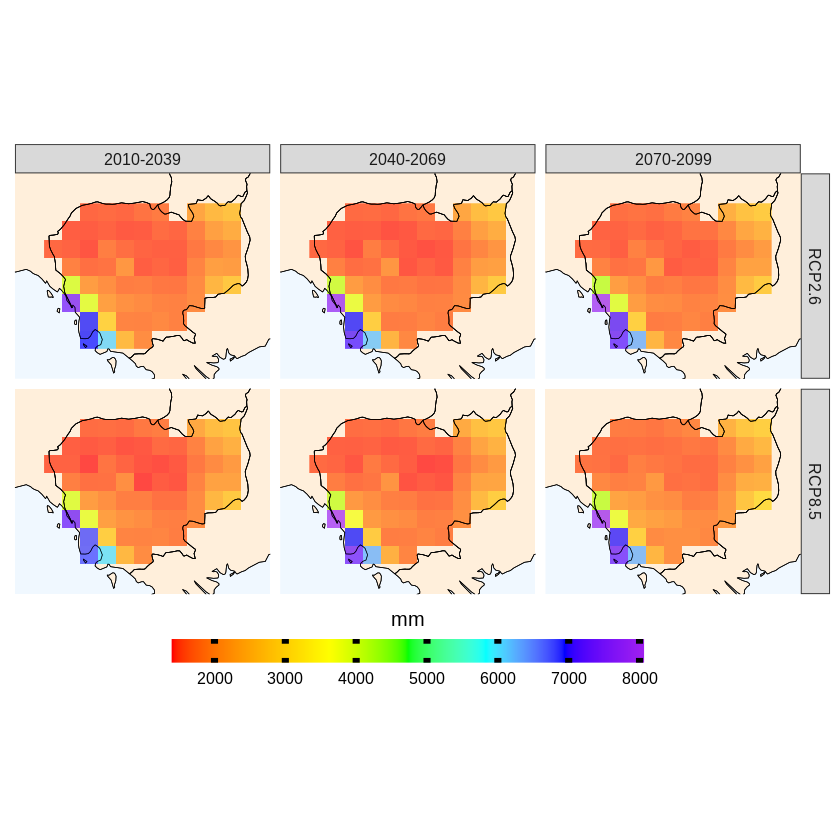

In [20]:
projections(Cambodia_cordex, season=1:12, trends=F)

**It is also possible to perform bias-correction. See how the results are scaled, particularly along the coast** 

2023-03-10 08:17:30 projections, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of total bias-corrected pr

2023-03-10 08:17:30  Performing bias correction with the scaling  method for each model separately and then calculating the ensemble mean. Season 1-2-3-4-5-6-7-8-9-10-11-12



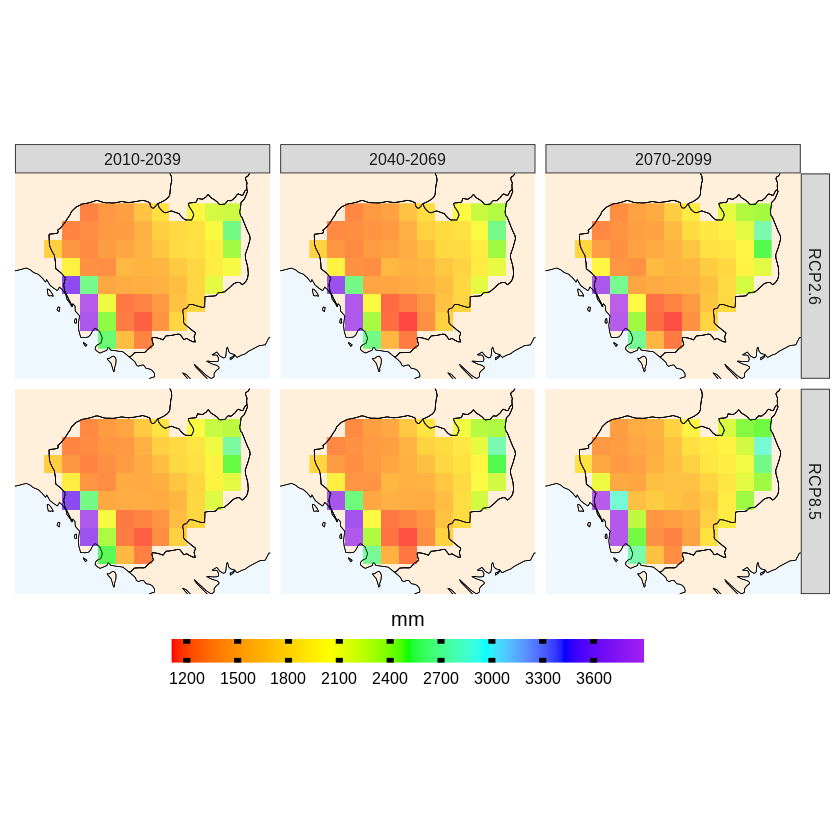

In [9]:
projections(Cambodia_cordex, season=1:12, trends=F, bias.correction = T)

**It is of course possible to change colors**


2023-03-10 08:20:38 projections, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of total  pr



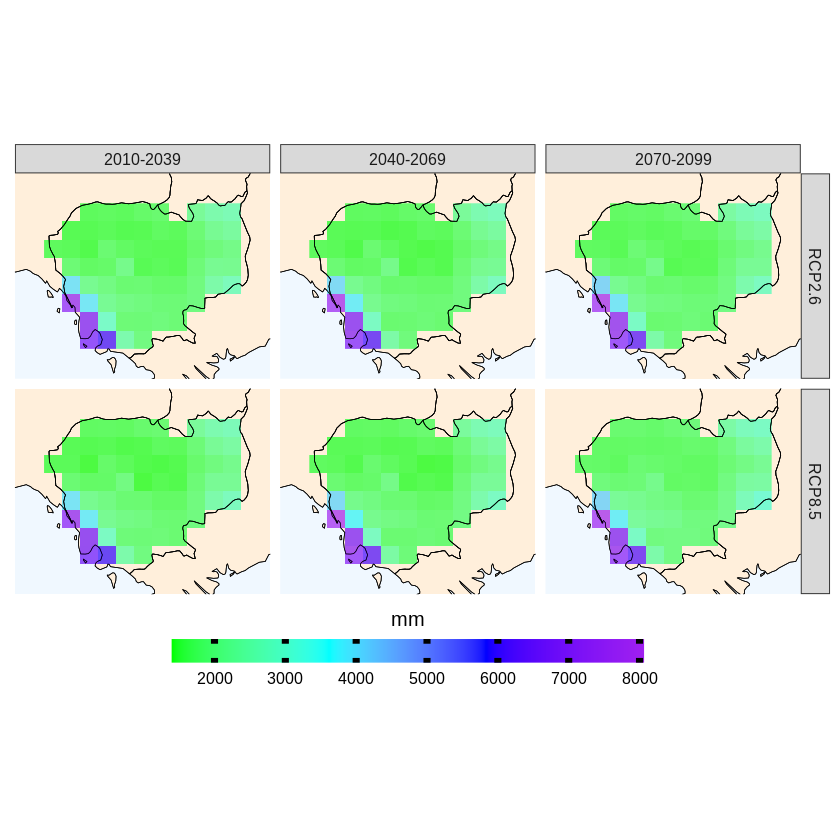

In [10]:
projections(Cambodia_cordex, season=1:12, trends=F, bias.correction = F, palette = c("green", "cyan", "blue", "purple"))

**Now we look at trends, to understand increase in precipitation and its statistical significance**

2023-03-10 08:15:25 projections, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of yearly increase in total pr



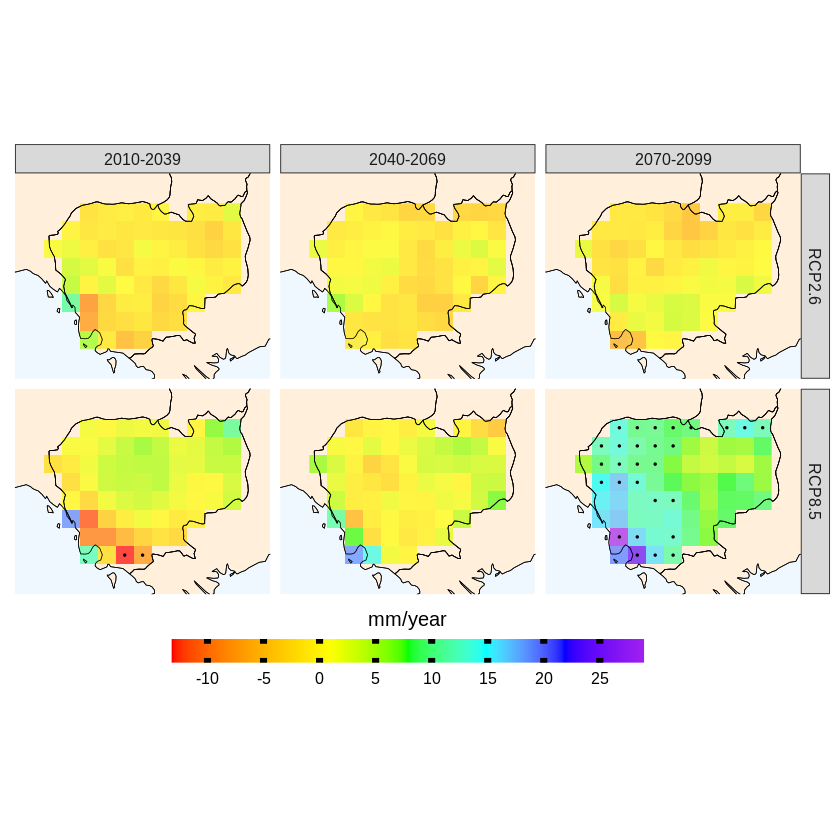

In [8]:
projections(Cambodia_cordex, season=1:12, trends=T)

**We can also look at particular thresholds, for example the number of dry days, which is define as the number of days with precipitation lower than 1 mm**

2023-03-10 08:22:16 projections, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of number of days with pr below threshold of 1



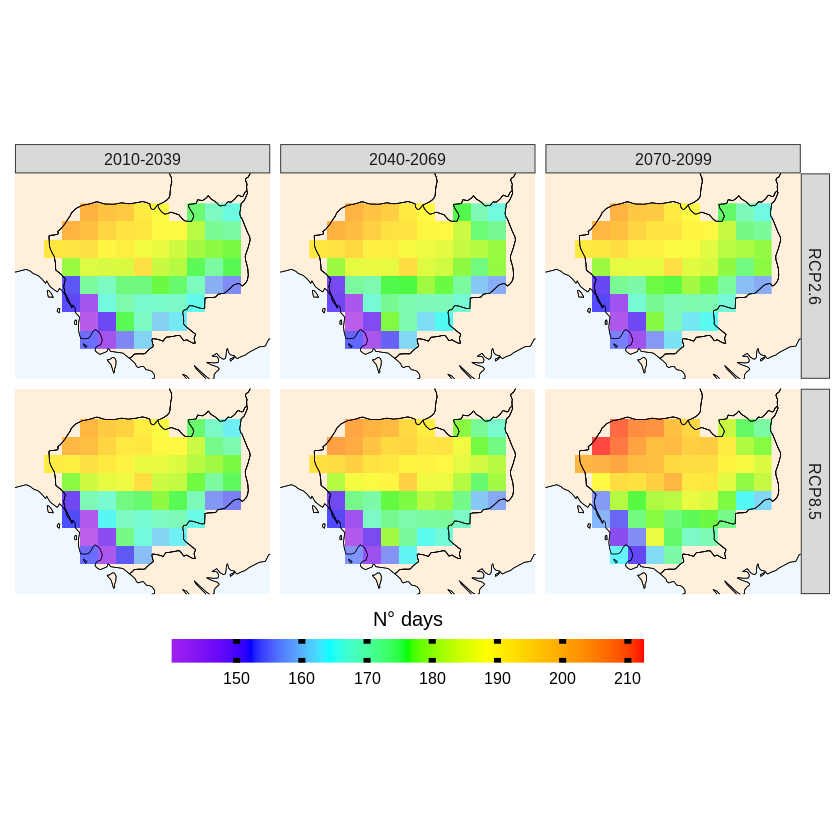

In [12]:
projections(Cambodia_cordex, season=1:12, lowert=1, trends=F)

**What about understanding whether there is a projected statistical significant increase in the number of dry days?**
It seems so but only for very limited areas

2023-03-10 08:24:23 projections, season 1-2-3-4-5-6-7-8-9-10-11-12. pr. Calculation of yearly increase in number of days below 1 



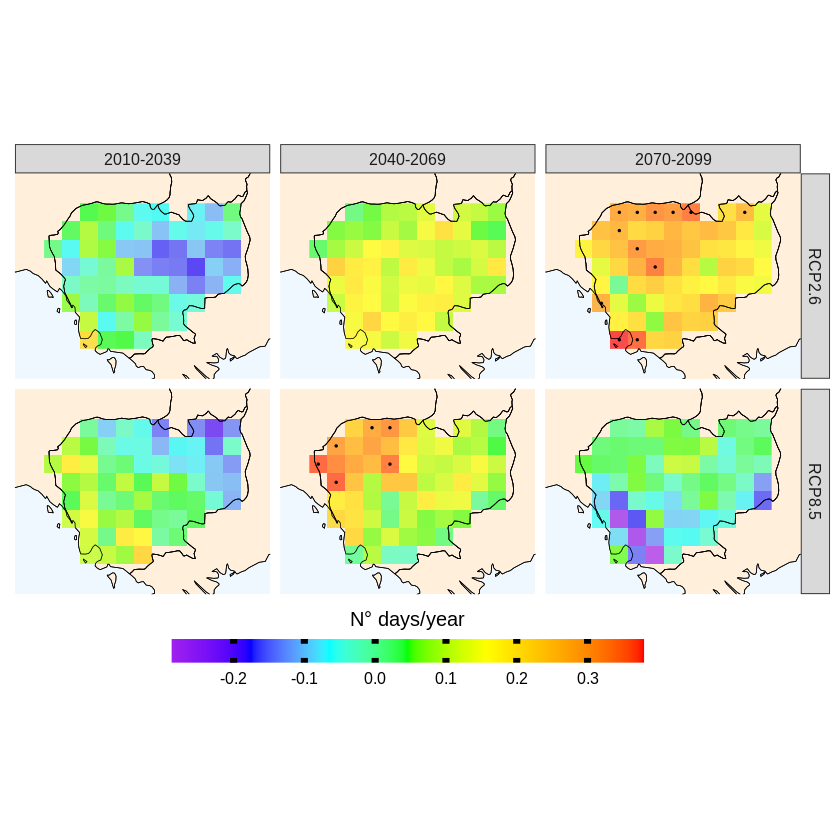

In [13]:
projections(Cambodia_cordex, season=1:12, lowert=1, trends=T)

## Climate change signal
Looking at the difference in total rainfall between historical and projections. 
The black cross indicates the pixels for which at least 60% of the models (4 out of 6) agree on the sign of the climate change signal

2023-03-10 09:05:54 ccs, season 1-2-3-4-5-6-7-8-9-10-11-12. Climate change signal calculated based on total pr

2023-03-10 09:06:00 Plotting



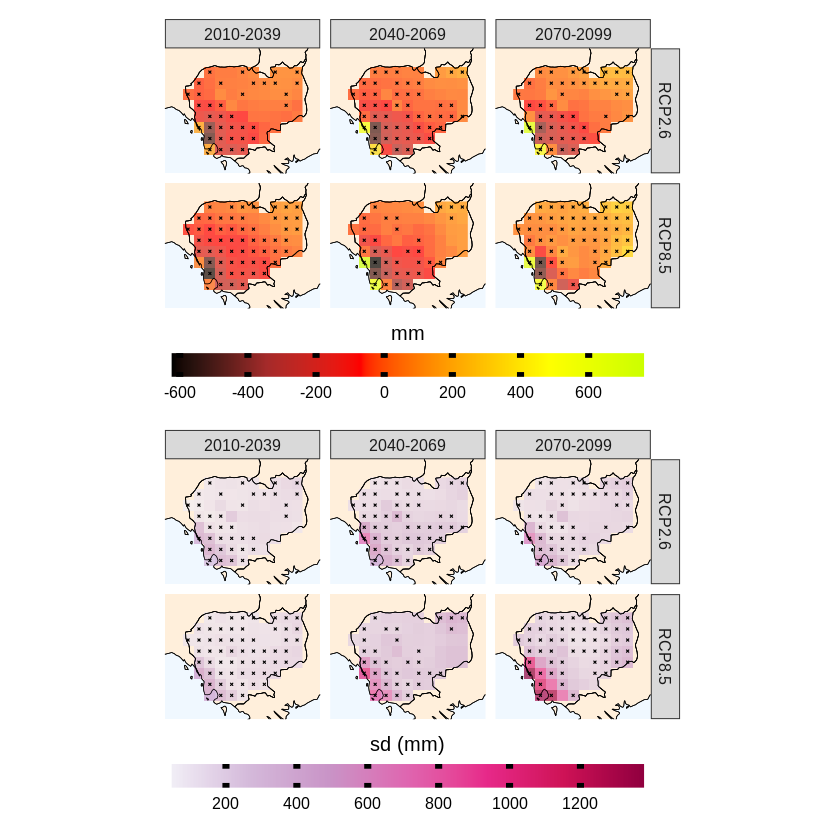

In [17]:
climate_change_signal(Cambodia_cordex, season=1:12)

**Looking at climate change signal for the number of dry days**

2023-03-10 09:06:57 ccs, season 1-2-3-4-5-6-7-8-9-10-11-12. pr. Climate change signal in terms of number of days below 1

2023-03-10 09:07:03 Plotting



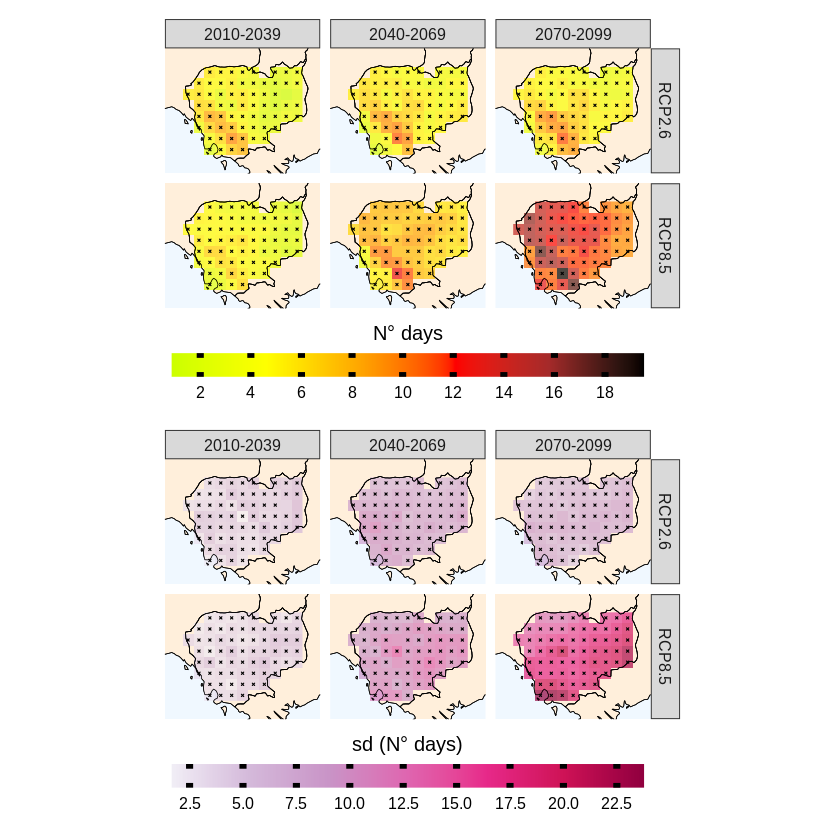

In [18]:
climate_change_signal(Cambodia_cordex, season=1:12, lowert=1)

## Historical (W5E5 data)
This works semilarly to projections, but it uses historical data (W5E5)

2023-03-10 14:39:04 Reference period 1981-2016, w5e5 dataset, season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of total pr

[2023-03-10 14:39:04] Performing annual aggregation...

[2023-03-10 14:39:05] Done.

2023-03-10 14:39:05 Plotting



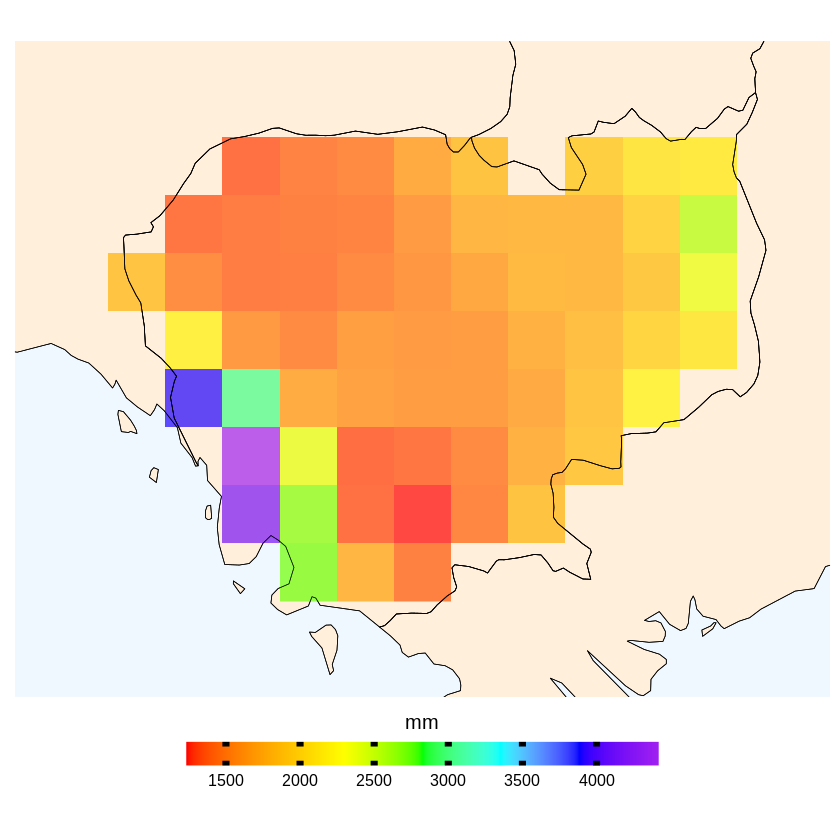

In [22]:
historical(Cambodia_cordex, season=1:12, trends=F)

## Trends
The function trends allow users to look at spatially aggregated data

2023-03-14 10:45:16 Season 1-2-3-4-5-6-7-8-9-10-11-12. Calculation of yearly increase in total  pr

[2023-03-14 10:45:22] Performing annual aggregation...

[2023-03-14 10:45:22] Done.

[2023-03-14 10:45:22] Performing annual aggregation...

[2023-03-14 10:45:22] Done.

2023-03-14 10:45:22 Done

Warning message:
“The `x` argument of `as_tibble.matrix()` must have unique column names if
`.name_repair` is omitted as of tibble 2.0.0.
ℹ Using compatibility `.name_repair`.”
Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
`geom_smooth()` using formula = 'y ~ x'
Warning message in max(ids, na.rm = TRUE):
“no non-missing arguments to max; returning -Inf”


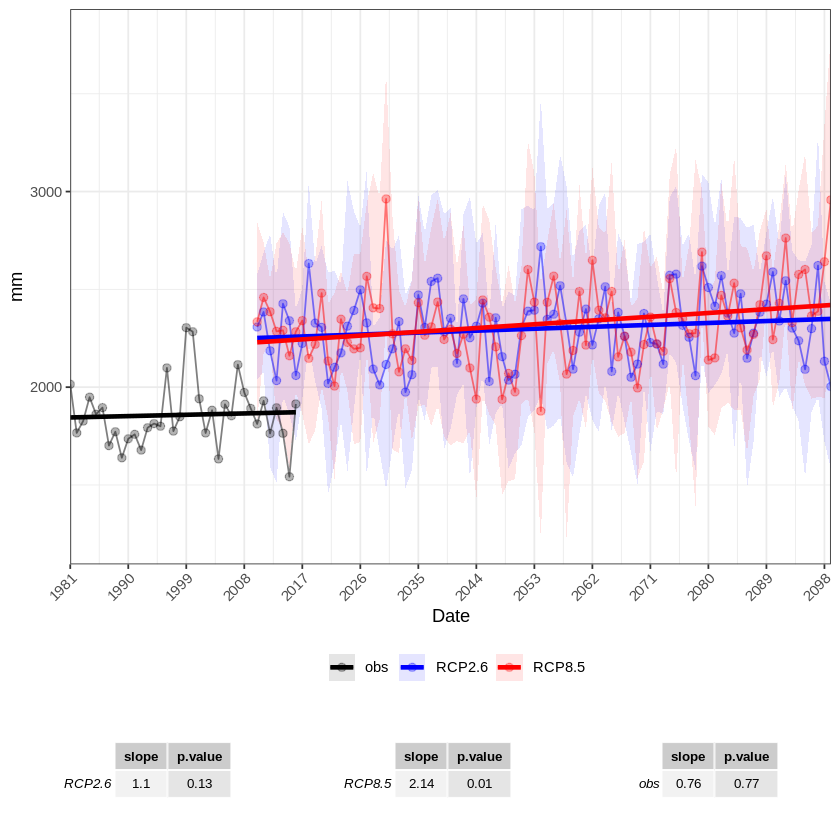

In [3]:
trends(Cambodia_cordex, season=1:12, bias.correction = F, save=T, plot_name="trends_Cambodia")

# Conclusion
You can explore the CAVA Analytics functions in more details in your own notebook and you can also learn how to use the climate4R framework by using the FAO or climate4r environment. If you encounter problems with CAVA Analytcis you can create an issue [here](https://github.com/Risk-Team/CAVA-Analytics/issues). 